In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import torch
import numpy as np
import cv2 as cv
from PIL import Image
import glob

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

model = YOLO('runs/detect/train2/weights/best.pt')
names = glob.glob('data_after_seg/valid/*/*.png')
predict_params = {"imgsz": 640, "conf": 0.3, "verbose": False, "device": "cpu", "max_det": 1}

In [10]:
img_root = names[25]

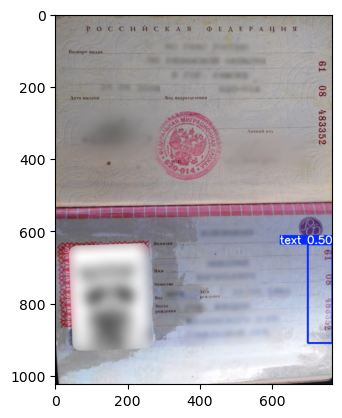

In [11]:
results = model(img_root, **predict_params)
annotated_frame = results[0].plot()
annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_frame)
plt.show()

In [12]:
results = model(img_root, **predict_params)
x1, y1, x2, y2 = results[0].boxes.xyxy[0]
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
x1, y1, x2, y2

(698, 637, 766, 910)

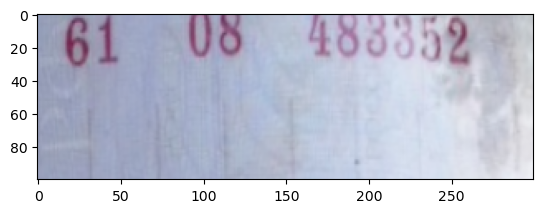

In [13]:
img = cv.imread(img_root)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = img[y1:y2, x1:x2]
if y2 - y1 > x2 - x1:
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # ROTATE_90_CLOCKWISE

img = cv2.resize(img, (300, 100))
cv.imwrite("test.jpg", img)
plt.imshow(img)

99 10 372465


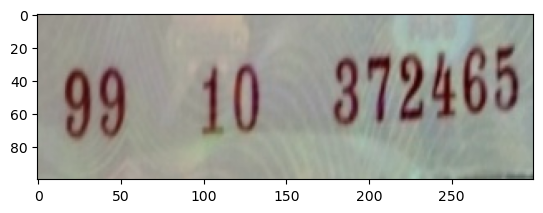

In [326]:
img = Image.open("test.jpg")
text = pytesseract.image_to_string(img)
text = text[:12]

img = cv.imread("test.jpg")
#img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(text)

for item in text:
    if not ("0" <= item <= "9" or item == " "):
        img = cv2.rotate(img, cv2.ROTATE_180)
        break

cv.imwrite("test.jpg", img)
plt.imshow(img)

In [327]:
img = Image.open("test.jpg")
text = pytesseract.image_to_string(img)
text = text[:12]
text

'99 10 372465'

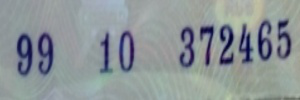

In [328]:
img